In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates

In [2]:
metro_pd = pd.read_csv('../CoVID-19_Dashboard_Data.csv')

In [3]:
type(metro_pd.Date[0])

str

In [4]:
metro_pd.Date = pd.to_datetime(metro_pd.Date)

In [5]:
type(metro_pd.Date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [6]:
a = metro_pd.set_index('Date')

In [7]:
a.index

DatetimeIndex(['2020-02-12 06:00:00', '2020-02-13 06:00:00',
               '2020-02-14 06:00:00', '2020-02-15 06:00:00',
               '2020-02-16 06:00:00', '2020-02-17 06:00:00',
               '2020-02-18 06:00:00', '2020-02-19 06:00:00',
               '2020-02-20 06:00:00', '2020-02-21 06:00:00',
               ...
                               'NaT',                 'NaT',
                               'NaT',                 'NaT',
                               'NaT',                 'NaT',
                               'NaT',                 'NaT',
                               'NaT',                 'NaT'],
              dtype='datetime64[ns]', name='Date', length=178, freq=None)

In [8]:
b = a.loc[a.index.dropna()]

In [9]:
b

,ObjectId,ReportedOn,ReportedCum,Deceased,Recovered,Hospitalized,ICU,Vent,StillIll,PosPatients,...,BCLabTests,BCTestNegative,BCTestPositive,BCTestInc,DBCLabTests,DBCTestNegative,DBCTestPositive,DBCTestInc,WeekQuar,EverQuar
Date,,,,,,,,,,,,,,,,,,,,,
2020-02-12 06:00:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-13 06:00:00,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-14 06:00:00,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-15 06:00:00,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-16 06:00:00,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-10 05:00:00,150,923.0,18602.0,1.0,6182.0,956.0,338.0,144.0,12254.0,1240.0,...,174401.0,151600.0,22660.0,141.0,4725.0,3433.0,1292.0,6.0,NaN,NaN
2020-07-11 05:00:00,151,535.0,19137.0,9.0,6182.0,958.0,338.0,145.0,12780.0,1221.0,...,176792.0,153399.0,23230.0,163.0,2391.0,1821.0,570.0,22.0,NaN,NaN
2020-07-12 05:00:00,152,511.0,19648.0,9.0,6182.0,958.0,338.0,145.0,13282.0,1265.0,...,178791.0,154956.0,23672.0,163.0,1999.0,1557.0,442.0,0.0,NaN,NaN


In [10]:
type(metro_pd.Date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [11]:
c = b['PosPatients'].dropna()

In [12]:
type(c.index[0])

pandas._libs.tslibs.timestamps.Timestamp

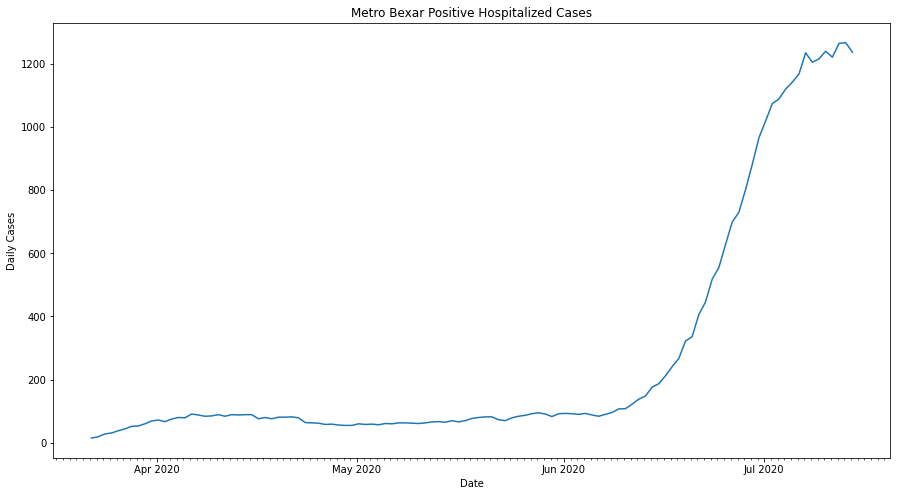

In [13]:
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(15,8)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.xaxis.set_minor_locator(days)
plt.xlabel('Date',color='black')
plt.ylabel('Daily Cases',color='black')
plt.title('Metro Bexar Positive Hospitalized Cases')
#plt.bar(c.index,c)
plt.plot(c)
fig.savefig('MetroPosHospitalized.png')

In [14]:
c

Date
2020-03-22 06:00:00      15.0
2020-03-23 06:00:00      19.0
2020-03-24 06:00:00      28.0
2020-03-25 06:00:00      31.0
2020-03-26 06:00:00      38.0
                        ...  
2020-07-10 05:00:00    1240.0
2020-07-11 05:00:00    1221.0
2020-07-12 05:00:00    1265.0
2020-07-13 05:00:00    1267.0
2020-07-14 05:00:00    1237.0
Name: PosPatients, Length: 115, dtype: float64

In [15]:
x = c.diff(periods = 1)

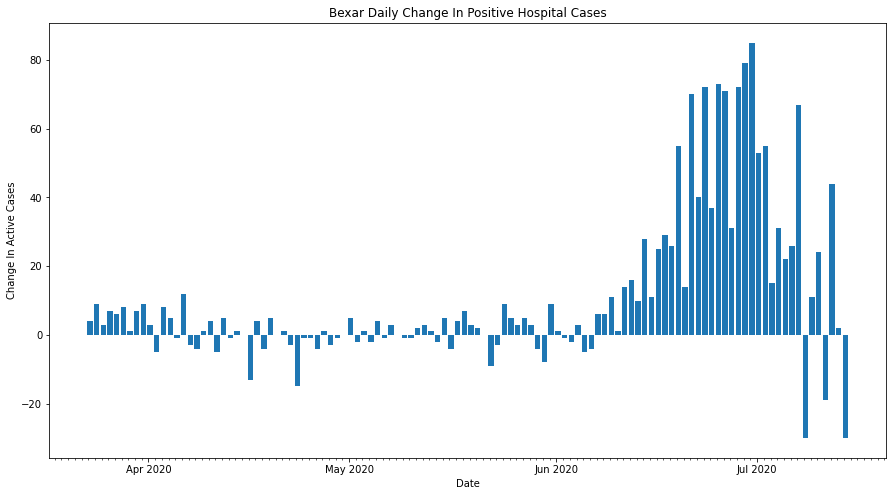

In [16]:
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(15,8)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.xaxis.set_minor_locator(days)
plt.xlabel('Date',color='black')
plt.ylabel('Change In Active Cases',color='black')
plt.title('Bexar Daily Change In Positive Hospital Cases')
plt.bar(x.index,x)
fig.savefig('BexarChangeInPosHospitalCases.png')

In [17]:
x

Date
2020-03-22 06:00:00     NaN
2020-03-23 06:00:00     4.0
2020-03-24 06:00:00     9.0
2020-03-25 06:00:00     3.0
2020-03-26 06:00:00     7.0
                       ... 
2020-07-10 05:00:00    24.0
2020-07-11 05:00:00   -19.0
2020-07-12 05:00:00    44.0
2020-07-13 05:00:00     2.0
2020-07-14 05:00:00   -30.0
Name: PosPatients, Length: 115, dtype: float64